In [123]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

from sklearn.preprocessing import StandardScaler

In [125]:
train_df = pd.read_csv(r'C:\Users\wania_96\Desktop\deep learning\playground-series-s4e1\train.csv')
test_df = pd.read_csv(r'C:\Users\wania_96\Desktop\deep learning\playground-series-s4e1\test.csv')


In [126]:
train_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [127]:
train_df.shape

(165034, 14)

In [128]:
train_df['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [129]:
X= train_df.iloc[:, 3:13]
y = train_df.iloc[:, 13]

In [130]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03


In [131]:
X['Gender'] = X['Gender'].replace({'Male': 1, 'Female': 0})
# Replace values in 'Geography' column
X['Geography'] = X['Geography'].replace({'Spain': 0, 'France': 1, 'Germany' :2})

In [132]:
test_df['Gender'] = test_df['Gender'].replace({'Male': 1, 'Female': 0})

# Replace values in 'Geography' column
test_df['Geography'] = test_df['Geography'].replace({'Spain': 0, 'France': 1,'Germany' :2})

In [133]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,1,1,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,1,1,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,1,1,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,1,1,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,0,1,33.0,5,0.00,2,1.0,1.0,15068.83


In [134]:
X.shape

(165034, 10)

In [135]:
test_df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [136]:
train_df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [137]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [138]:
test_df.drop(['id', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [139]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
15225,492,1,1,32.0,10,0.00,2,1.0,1.0,49463.44
28152,696,1,0,32.0,0,0.00,1,1.0,1.0,75578.67
117535,652,0,1,43.0,10,123817.85,2,1.0,1.0,92910.53
92286,651,1,1,41.0,4,0.00,1,1.0,1.0,132798.58
133713,744,1,0,39.0,7,0.00,1,1.0,0.0,131763.66
...,...,...,...,...,...,...,...,...,...,...
97639,559,2,1,45.0,3,111634.29,1,1.0,1.0,103349.74
95939,597,2,1,41.0,10,119182.73,1,0.0,0.0,121299.14
152315,576,0,1,31.0,6,127299.56,1,1.0,1.0,57569.89
117952,751,1,0,27.0,4,90721.11,1,0.0,0.0,84496.78


In [140]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test_df_scaled = sc.transform(test_df)

In [141]:
## Perform Hyperparameter Optimization

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid

In [142]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [143]:
model = KerasClassifier(build_fn=create_model, verbose=0)

C:\Users\wania_96\AppData\Local\Temp\ipykernel_16112\2566461152.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [144]:
layers = [[20], [40, 20], [45, 30, 15]] #1 layers with 20 neurons, 2 layers with 40 and 20 neurons, 3 layers with 45,30,15 neurons 
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5,return_train_score=True)

grid_result = grid.fit(X_train, y_train)

[grid_result.best_score_,grid_result.best_params_]

[0.8637248396873474,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': [45, 30, 15]}]

In [145]:
# Accessing grid search results
results = grid_result.cv_results_

# Displaying mean training and validation scores for each combination
for mean_train_score, mean_val_score, params in zip(results['mean_train_score'], results['mean_test_score'], results['params']):
    print(f'Mean Train Score: {np.mean(mean_train_score):.4f}, Mean Validation Score: {np.mean(mean_val_score):.4f}, Parameters: {params}')

# Displaying the best score and best parameters
print(f'Best Score: {grid_result.best_score_:.4f}')
print(f'Best Parameters: {grid_result.best_params_}')

Mean Train Score: 0.8598, Mean Validation Score: 0.8592, Parameters: {'activation': 'sigmoid', 'batch_size': 128, 'epochs': 30, 'layers': [20]}
Mean Train Score: 0.8616, Mean Validation Score: 0.8609, Parameters: {'activation': 'sigmoid', 'batch_size': 128, 'epochs': 30, 'layers': [40, 20]}
Mean Train Score: 0.8621, Mean Validation Score: 0.8616, Parameters: {'activation': 'sigmoid', 'batch_size': 128, 'epochs': 30, 'layers': [45, 30, 15]}
Mean Train Score: 0.8579, Mean Validation Score: 0.8576, Parameters: {'activation': 'sigmoid', 'batch_size': 256, 'epochs': 30, 'layers': [20]}
Mean Train Score: 0.8575, Mean Validation Score: 0.8567, Parameters: {'activation': 'sigmoid', 'batch_size': 256, 'epochs': 30, 'layers': [40, 20]}
Mean Train Score: 0.8609, Mean Validation Score: 0.8607, Parameters: {'activation': 'sigmoid', 'batch_size': 256, 'epochs': 30, 'layers': [45, 30, 15]}
Mean Train Score: 0.8606, Mean Validation Score: 0.8602, Parameters: {'activation': 'relu', 'batch_size': 128, '

In [146]:
from sklearn.metrics import roc_auc_score

# Assuming you have a trained model and X_test, y_test for testing
y_pred_proba = grid.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate AUC-ROC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'AUC-ROC Score: {roc_auc:.4f}')

1032/1032 [==============================] - 2s 2ms/step
AUC-ROC Score: 0.8861


1032/1032 [==============================] - 1s 1ms/step


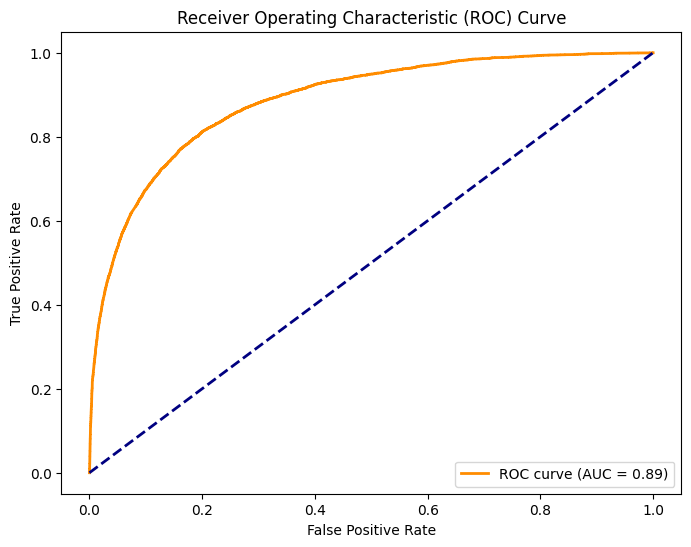

In [147]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have a trained model and X_test, y_test for testing
y_pred_proba = grid.predict_proba(X_test)[:, 1]  # Probability of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [148]:
y_pred_proba_ = grid.predict_proba(test_df_scaled)[:, 1] 

3439/3439 [==============================] - 5s 2ms/step


In [149]:
test_df['Exited'] = y_pred_proba_
test_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,586,1,0,23.0,2,0.00,2,0.0,1.0,160976.75,0.024238
1,683,1,0,46.0,2,0.00,1,1.0,0.0,72549.27,0.815141
2,656,1,0,34.0,7,0.00,2,1.0,0.0,138882.09,0.033305
3,681,1,1,36.0,8,0.00,1,1.0,0.0,113931.57,0.238355
4,752,2,1,38.0,10,121263.62,1,1.0,0.0,139431.00,0.333189


In [150]:
submission_df = pd.read_csv(r'C:\Users\wania_96\Desktop\deep learning\playground-series-s4e1\test.csv')

In [151]:


# Create a DataFrame with 'id' and predicted probabilities
output_df = pd.DataFrame({'id': submission_df['id'], 'Exited': test_df['Exited']})

# Save the DataFrame to a CSV file
output_df.to_csv('output_file.csv', index=False)

# Display the first few rows of the resulting DataFrame
print(output_df.head())

       id    Exited
0  165034  0.024238
1  165035  0.815141
2  165036  0.033305
3  165037  0.238355
4  165038  0.333189
